In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#########
import seaborn as sns

import matplotlib

import numpy as numpy
import pandas as pandas
import statsmodels.api
import statsmodels.formula.api as smf
import statsmodels.api as sm

import statsmodels.stats.multicomp as multi 

import scipy
import matplotlib.pyplot as plt
import warnings 

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier

warnings.simplefilter(action = "ignore", category = FutureWarning) 
from subprocess import check_output


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
sd = pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1").rename(columns=lambda x: x.strip())
sd.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
temp1=sd[['iid','gender','pid','samerace','age_o','race_o','dec_o','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','prob_o','age','field_cd','race','imprace','imprelig','from','date','go_out','dec','attr','sinc','intel','fun','amb','shar','like','prob']]

In [5]:
#Creation DataSet for Merging Missing Variables
temp2=temp1[['iid','field_cd','imprace','imprelig','from','date','go_out']]
#Rename the variables to avoid confusion with the two data frames...
temp2.columns = ['pid','field_cd_o','imprace_o','imprelig_o','from_0','date_0','go_out_o']
#Merge the two datasets to have all the variables for both the partners.
BothGenders=pandas.merge(temp1,temp2,on='pid')

BothGenders=BothGenders.drop('iid',1)
BothGenders=BothGenders.drop('pid',1)
BothGenders=BothGenders.dropna()

In [6]:
Females=BothGenders.loc[BothGenders['gender'] == 0]
Males=BothGenders.loc[BothGenders['gender'] == 1]

In [7]:
#Average for all the Features Group by 'dec' factor
#Females
Females[Females.columns[:]].groupby(Females['dec']).mean().round(2)

,gender,samerace,age_o,race_o,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,...,fun,amb,shar,like,prob,field_cd_o,imprace_o,imprelig_o,date_0,go_out_o
dec,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.37,26.60,2.80,0.51,6.48,7.06,7.14,6.40,6.47,...,5.62,6.63,4.69,5.29,4.78,7.35,3.63,3.13,4.97,2.24
1,0.0,0.42,26.45,2.58,0.46,6.26,7.46,7.48,6.62,6.71,...,7.34,7.37,6.57,7.18,5.96,7.47,3.59,3.05,4.63,1.95


In [8]:
#Males
Males[Males.columns[:]].groupby(Males['dec']).mean().round(2)

,gender,samerace,age_o,race_o,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,...,fun,amb,shar,like,prob,field_cd_o,imprace_o,imprelig_o,date_0,go_out_o
dec,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.39,25.93,2.95,0.40,6.05,6.90,7.34,6.19,6.82,...,5.76,6.20,4.68,5.28,4.50,8.13,4.24,4.32,5.20,2.23
1,1.0,0.40,25.81,2.74,0.35,5.83,7.23,7.57,6.37,7.03,...,7.23,6.91,6.35,7.19,5.95,8.11,4.25,4.21,5.13,2.09


In [9]:

model1 = smf.ols(formula='dec ~ C(samerace)+age_o+C(race_o)+dec_o+attr_o+sinc_o+intel_o+fun_o+amb_o+shar_o+like_o+prob_o+imprace+imprelig+date+go_out+attr+sinc+intel+fun+amb+shar+like+prob+age+age_o+go_out_o+date_0+C(race)', data=Females)
results1 = model1.fit()

table = sm.stats.anova_lm(results1, typ=2)
table

,sum_sq,df,F,PR(>F)
C(samerace),51.069340,1.0,327.706547,5.325354e-73
C(race_o),3.949856,4.0,6.336453,4.298649e-05
C(race),228.587946,4.0,366.706162,1.318874e-311
age_o,4.803000,1.0,30.820341,2.845533e-08
dec_o,13.913137,1.0,89.279129,3.577493e-21
attr_o,83.088851,1.0,533.172362,2.531863e-117
sinc_o,8.991762,1.0,57.699185,3.109697e-14
intel_o,1.993391,1.0,12.791377,3.485639e-04
fun_o,0.816281,1.0,5.237986,2.210318e-02
amb_o,1.897872,1.0,12.178444,4.838843e-04


In [49]:
temp1=sd[sd['wave'].between(10,22)][['samerace','age_o','race_o','dec_o','attr_o','sinc_o','intel_o','fun_o',\
          'amb_o','shar_o','like_o','prob_o','age','field_cd','race','imprace',\
          'imprelig','date','go_out','dec','attr','sinc','intel',\
          'fun','amb','shar','like','prob','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', \
          'amb1_1','shar1_1','attr2_1', 'sinc2_1','intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',\
          'attr4_1','sinc4_1','fun4_1', 'intel4_1', 'amb4_1','shar4_1','sports',\
          'tvsports','exercise','dining','museums','art','hiking','gaming','clubbing',\
          'reading','tv','theater','movies','concerts','music','shopping','yoga',\
          'attr3_1','sinc3_1','fun3_1', 'intel3_1', 'amb3_1',\
          'attr5_1','sinc5_1','fun5_1', 'intel5_1', 'amb5_1']]
temp1.describe()

,samerace,age_o,race_o,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,...,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,fun5_1,intel5_1,amb5_1
count,4970.000000,4910.000000,4932.000000,4970.000000,4802.000000,4760.000000,4746.000000,4743.000000,4518.000000,4346.000000,...,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000
mean,0.394366,26.704684,2.821371,0.415493,6.160121,7.122899,7.317952,6.377398,6.713922,5.411183,...,7.059519,8.335304,7.704851,8.353649,7.630656,6.941908,7.927232,7.426213,8.284346,7.617611
std,0.488763,3.506412,1.237685,0.492856,1.937155,1.781250,1.561943,1.939156,1.797841,2.187353,...,1.386010,1.422652,1.526699,1.090167,1.717378,1.498653,1.627054,1.779129,1.283657,1.773094
min,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000
25%,0.000000,24.000000,2.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,...,6.000000,8.000000,7.000000,8.000000,7.000000,6.000000,7.000000,6.000000,8.000000,7.000000
50%,0.000000,26.000000,2.000000,0.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,...,7.000000,9.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000
75%,1.000000,29.000000,4.000000,1.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000
max,1.000000,55.000000,6.000000,1.000000,10.500000,10.000000,10.000000,11.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [52]:
temp1.dropna(axis=0,how='any',inplace=True)

In [53]:
temp1.isnull().sum()

samerace    0
age_o       0
race_o      0
dec_o       0
attr_o      0
sinc_o      0
intel_o     0
fun_o       0
amb_o       0
shar_o      0
like_o      0
prob_o      0
age         0
field_cd    0
race        0
imprace     0
imprelig    0
date        0
go_out      0
dec         0
attr        0
sinc        0
intel       0
fun         0
amb         0
shar        0
like        0
prob        0
attr1_1     0
sinc1_1     0
           ..
intel4_1    0
amb4_1      0
shar4_1     0
sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
attr3_1     0
sinc3_1     0
fun3_1      0
intel3_1    0
amb3_1      0
attr5_1     0
sinc5_1     0
fun5_1      0
intel5_1    0
amb5_1      0
Length: 73, dtype: int64

In [54]:
%pylab inline
corr=temp1.corr()
corr

Populating the interactive namespace from numpy and matplotlib


,samerace,age_o,race_o,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,...,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,fun5_1,intel5_1,amb5_1
samerace,1.000000,-0.028522,-0.224013,0.021158,0.056937,0.021809,0.013704,0.034808,0.012047,0.055490,...,0.000944,-0.028182,-0.066750,-0.004972,-0.012074,-0.023479,-0.025077,-0.024849,-0.019873,0.003828
age_o,-0.028522,1.000000,-0.029283,-0.018712,0.013617,-0.002672,-0.027490,-0.025895,-0.042323,0.003489,...,-0.021953,0.006089,-0.010051,-0.014843,-0.019275,-0.025478,0.006841,-0.005831,-0.031746,0.002976
race_o,-0.224013,-0.029283,1.000000,0.100080,0.002528,-0.070094,-0.076038,-0.025517,-0.082059,0.024500,...,0.022801,0.022042,0.019636,-0.028215,-0.021346,0.033717,0.029320,0.035873,-0.019695,-0.023193
dec_o,0.021158,-0.018712,0.100080,1.000000,0.464148,0.206511,0.223689,0.405296,0.190727,0.412203,...,0.057552,-0.023366,0.026835,-0.083447,-0.022325,0.071640,0.007473,0.061942,-0.044190,0.010559
attr_o,0.056937,0.013617,0.002528,0.464148,1.000000,0.405302,0.389284,0.582450,0.360182,0.485388,...,0.155599,-0.023634,0.093565,-0.063770,0.018869,0.171522,-0.004310,0.109467,-0.052059,0.055473
sinc_o,0.021809,-0.002672,-0.070094,0.206511,0.405302,1.000000,0.659121,0.517311,0.448444,0.393377,...,-0.031711,0.012275,0.012230,-0.033707,-0.048850,-0.020574,0.036751,0.007382,-0.048629,-0.010459
intel_o,0.013704,-0.027490,-0.076038,0.223689,0.389284,0.659121,1.000000,0.513762,0.635959,0.389284,...,-0.024216,-0.020773,-0.033736,0.002800,-0.041086,-0.023566,0.009821,-0.028190,0.006796,0.009063
fun_o,0.034808,-0.025895,-0.025517,0.405296,0.582450,0.517311,0.513762,1.000000,0.502209,0.599574,...,0.025039,-0.035049,0.111607,-0.053880,0.012361,0.020967,0.005201,0.130929,-0.050642,0.047267
amb_o,0.012047,-0.042323,-0.082059,0.190727,0.360182,0.448444,0.635959,0.502209,1.000000,0.419201,...,-0.006308,-0.036006,0.002810,0.010945,0.041821,0.007905,-0.021888,0.012052,-0.026984,0.044881
shar_o,0.055490,0.003489,0.024500,0.412203,0.485388,0.393377,0.389284,0.599574,0.419201,1.000000,...,0.058397,-0.031126,0.043403,-0.008245,-0.002104,0.052938,0.018948,0.073067,-0.003989,0.041235


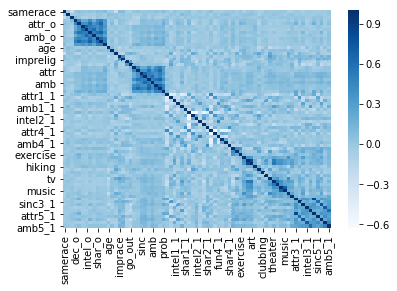

In [55]:
sns.heatmap(temp1.corr(),cmap='Blues')

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [57]:
from multiprocessing.dummy import Pool
import functools

kmeans = KMeans()

# define your custom function for passing into each thread
def find_cluster(n_clusters, kmeans, X):
    from sklearn.metrics import silhouette_score  # you want to import in the scorer in your function

    kmeans.set_params(n_clusters=n_clusters)  # set n_cluster
    labels = kmeans.fit_predict(X)  # fit & predict
    score = silhouette_score(X, labels)  # get the score

    return score

# Now's the parallel implementation
clusters = [2, 3, 4, 5, 6]
pool = Pool()
res = pool.map(functools.partial(find_cluster, kmeans=kmeans, X=temp1), clusters)
pool.close()
pool.join()

# print the results
res

[0.11035646285867329,
 0.099423277201655585,
 0.098816465137704437,
 0.098159075421054925,
 0.091324372073575424]

In [59]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,10):
    clus = [KMeans(n_clusters=k,n_jobs=-1), Birch(n_clusters=k), 
            AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(temp1)
        sil = metrics.silhouette_score(temp1, res.labels_)
        print (str(cl)[:10] + ' with k =' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl

KMeans(alg with k =2: 0.233
Birch(bran with k =2: 0.2017
Agglomerat with k =2: 0.2017
KMeans(alg with k =3: 0.15
Birch(bran with k =3: 0.1761
Agglomerat with k =3: 0.1761
KMeans(alg with k =4: 0.1323
Birch(bran with k =4: 0.095
Agglomerat with k =4: 0.095
KMeans(alg with k =5: 0.1102
Birch(bran with k =5: 0.1014
Agglomerat with k =5: 0.1014
KMeans(alg with k =6: 0.0967
Birch(bran with k =6: 0.0693
Agglomerat with k =6: 0.0693
KMeans(alg with k =7: 0.0871
Birch(bran with k =7: 0.0765
Agglomerat with k =7: 0.0765
KMeans(alg with k =8: 0.0941
Birch(bran with k =8: 0.067
Agglomerat with k =8: 0.067
KMeans(alg with k =9: 0.0951
Birch(bran with k =9: 0.0747
Agglomerat with k =9: 0.0747
